In [ ]:
"""
This file uses the emails.csv dataset, found in the DATA folder of the DS4002-Project1 repository, 
to clean and preprocess textual email data. This file also performs some exploratory data analysis, 
providing informative graphs and tables that reflect relationships between key variables. It is imperative
to run this file tp preprocess the textual data before performing any further analyses/running ML algorithms 
on the data. 
"""

In [1]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
#from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /Users/Nata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Nata/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r"/Users/Nata/Downloads/emails (1).csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Replace spam labels for clarity
df = df.replace({'spam': {1: 'Spam', 0: 'Not Spam'}})

# Rename columns for clarity
df = df.rename(columns={'spam': 'Spam or Not Spam', 'text': 'Email Text'})

# Displaying basic dataset info
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing vals
print("\nMissing Values:")
print(df.isnull().sum())

# Summary of text lengths
df["Text Length"] = df["Email Text"].apply(lambda x: len(str(x)))
print("\nText Length Statistics:")
print(df["Text Length"].describe())

Dataset Shape: (5728, 2)
Column Names: Index(['Email Text', 'Spam or Not Spam'], dtype='object')

First 5 rows:
                                          Email Text Spam or Not Spam
0  Subject: naturally irresistible your corporate...             Spam
1  Subject: the stock trading gunslinger  fanny i...             Spam
2  Subject: unbelievable new homes made easy  im ...             Spam
3  Subject: 4 color printing special  request add...             Spam
4  Subject: do not have money , get software cds ...             Spam

Missing Values:
Email Text          0
Spam or Not Spam    0
dtype: int64

Text Length Statistics:
count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: Text Length, dtype: float64


In [4]:
df.head()

,Email Text,Spam or Not Spam,Text Length
0,Subject: naturally irresistible your corporate...,Spam,1484
1,Subject: the stock trading gunslinger fanny i...,Spam,598
2,Subject: unbelievable new homes made easy im ...,Spam,448
3,Subject: 4 color printing special request add...,Spam,500
4,"Subject: do not have money , get software cds ...",Spam,235


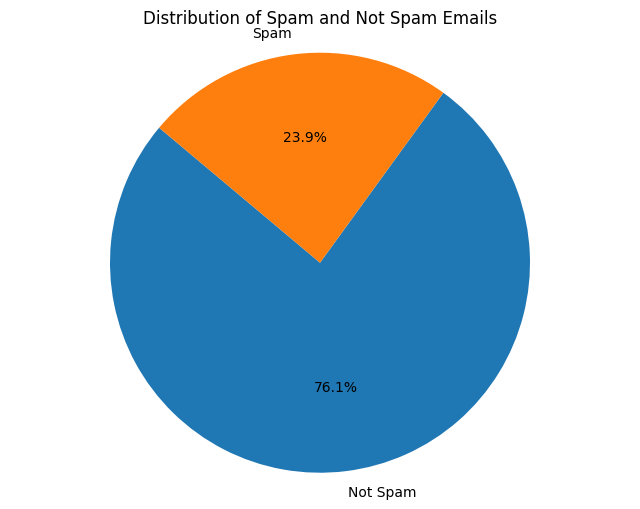

In [19]:
df['Spam or Not Spam'].value_counts()

# Percentage of Emails that are Spam and Not Spam
plt.figure(figsize=(8, 6))
plt.pie(df['Spam or Not Spam'].value_counts(), labels=df['Spam or Not Spam'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Not Spam Emails')
plt.axis('equal') 
plt.show()

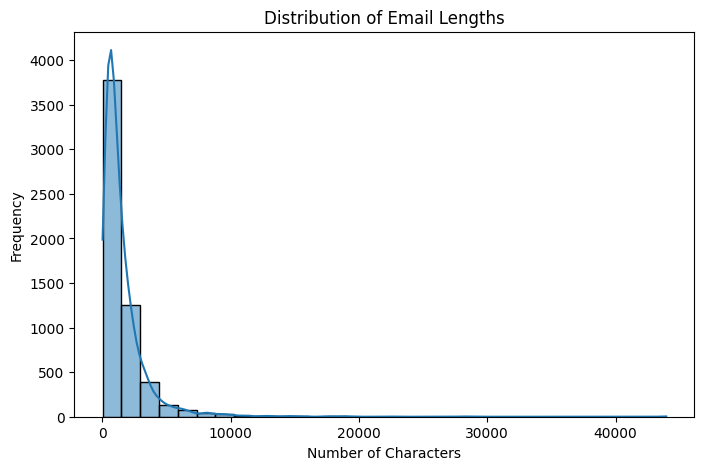

In [6]:
# Visualize distribution of email lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["Text Length"], bins=30, kde=True)
plt.title("Distribution of Email Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

Average Character Count of Spam Emails: 1317.2573099415204
Average Character Count of Not Spam Emails: 1631.918119266055


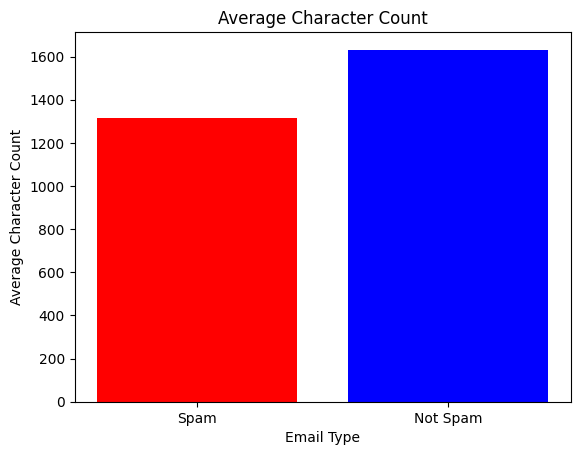

In [7]:
avg_length_spam = df[df['Spam or Not Spam'] == 'Spam']['Text Length'].mean()
avg_length_ham = df[df['Spam or Not Spam'] == 'Not Spam']['Text Length'].mean()

# Average Character Count of Spam and Not Spam Emails
print("Average Character Count of Spam Emails:", avg_length_spam)
print("Average Character Count of Not Spam Emails:", avg_length_ham)
plt.bar(['Spam', 'Not Spam'], [avg_length_spam, avg_length_ham], color=['red', 'Blue'])
plt.title('Average Character Count in Spam vs. Not Spam')
plt.xlabel('Email Type')
plt.ylabel('Average Character Count')
plt.show()

Average Words of Spam Emails: 267.89619883040933
Average Words of Not Spam Emails: 346.83532110091744


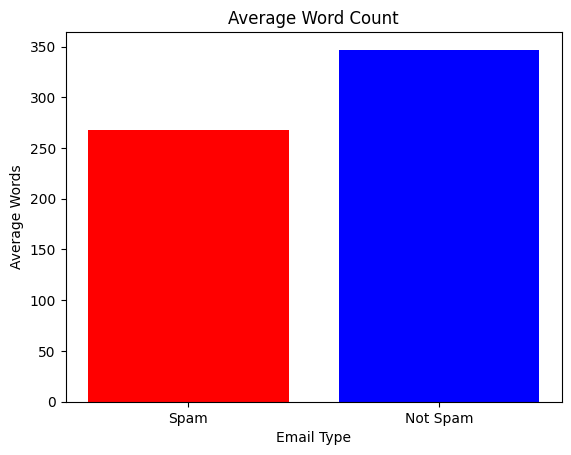

In [8]:
df['Word Count'] = df['Email Text'].apply(nltk.word_tokenize).apply(len)
avg_words_spam = df[df['Spam or Not Spam'] == 'Spam']['Word Count'].mean()
avg_words_ham = df[df['Spam or Not Spam'] == 'Not Spam']['Word Count'].mean()

# Average Word Count in Spam and Not Spam Emails
print("Average Words of Spam Emails:", avg_words_spam)
print("Average Words of Not Spam Emails:", avg_words_ham)
plt.bar(['Spam', 'Not Spam'], [avg_words_spam, avg_words_ham], color=['red', 'Blue'])
plt.title('Average Word Count in Spam vs. Not Spam')
plt.xlabel('Email Type')
plt.ylabel('Average Word Count')
plt.show()

Average Sentences of Spam Emails: 18.274122807017545
Average Sentences of Not Spam Emails: 19.86261467889908


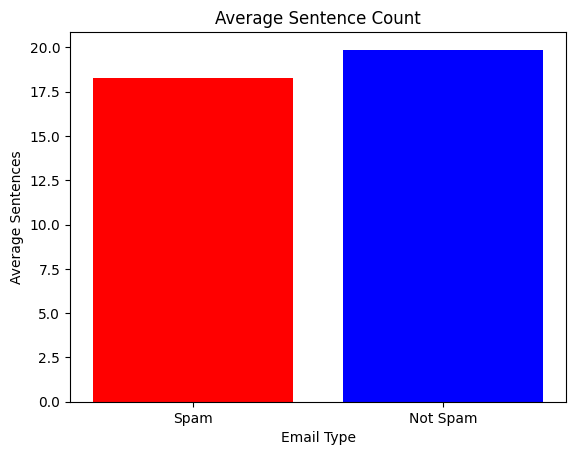

In [9]:
df['Sentence Count'] = df['Email Text'].apply(nltk.sent_tokenize).apply(len)
avg_sentence_spam = df[df['Spam or Not Spam'] == 'Spam']['Sentence Count'].mean()
avg_sentence_ham = df[df['Spam or Not Spam'] == 'Not Spam']['Sentence Count'].mean()

# Average Sentence Count in Spam and Not Spam Emails
print("Average Sentences of Spam Emails:", avg_sentence_spam)
print("Average Sentences of Not Spam Emails:", avg_sentence_ham)
plt.bar(['Spam', 'Not Spam'], [avg_sentence_spam, avg_sentence_ham], color=['red', 'Blue'])
plt.title('Average Sentence Count in Spam vs. Not Spam')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence Count')
plt.show()

In [10]:
# TEXT PREPROCESSING 

In [11]:
# Convert text to lowercase 
df['Preprocessed Text'] = df['Email Text'].str.lower()

# Tokenize sentences 
df['Preprocessed Text'] = df['Preprocessed Text'].apply(nltk.word_tokenize)

# Remove stop words and special characters 
df['Preprocessed Text'] = df['Preprocessed Text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])
stop_words = nltk.corpus.stopwords.words('english')
# Add 'subject' to the list of stopwords since all email text contains the word 'subject'
stop_words.append('subject')
df['Preprocessed Text'] = df['Preprocessed Text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming - converting words to their root form for standardization
ps = PorterStemmer()
df['Preprocessed Text'] = df['Preprocessed Text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
df['Preprocessed Text'] = df['Preprocessed Text'].apply(lambda x: ' '.join(x))


In [12]:
df.head()

,Email Text,Spam or Not Spam,Text Length,Word Count,Sentence Count,Preprocessed Text
0,Subject: naturally irresistible your corporate...,Spam,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,Spam,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,Spam,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,Spam,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",Spam,235,53,9,money get softwar cd softwar compat great grow...


In [13]:
# Spam word frequency analysis 

spam_emails = df[df['Spam or Not Spam'] == 'Spam']['Preprocessed Text']
# Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam Emails:", most_common_words)

Top 10 Most Common Words in Spam Emails: [('compani', 1065), ('com', 1000), ('1', 952), ('mail', 917), ('busi', 897), ('email', 865), ('inform', 818), ('receiv', 727), ('e', 701), ('get', 694)]


In [14]:
# Not Spam word frequency analysis 

not_spam_emails = df[df['Spam or Not Spam'] == 'Not Spam']['Preprocessed Text']
# Tokenize the text in spam emails
not_spam_words = ' '.join(not_spam_emails).split()
# Count occurrences of each word
word_counts = Counter(not_spam_words)
# Find the most common words
most_common_words_ham = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam Emails:", most_common_words_ham)

Top 10 Most Common Words in Spam Emails: [('enron', 13388), ('ect', 11417), ('vinc', 8531), ('hou', 5569), ('2000', 4935), ('kaminski', 4801), ('pleas', 4494), ('com', 4444), ('would', 4151), ('cc', 3889)]


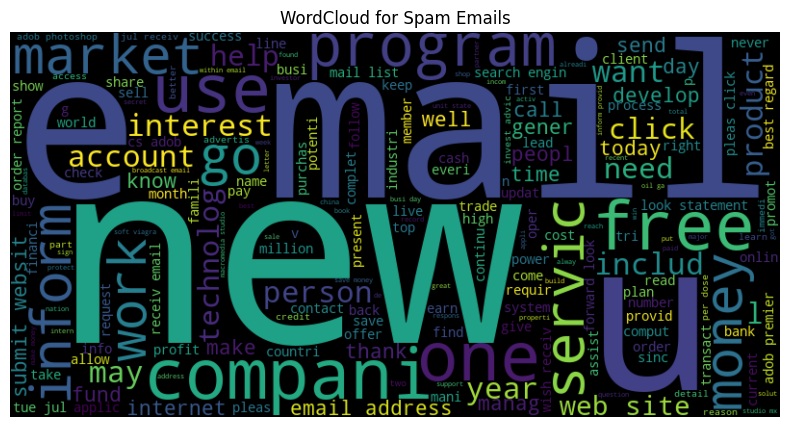

In [15]:
# Word cloud visualization for spam emails
spam_text = " ".join(spam_words)
wordcloud_spam = WordCloud(width=800, height=400, background_color="black").generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Spam Emails")
plt.show()

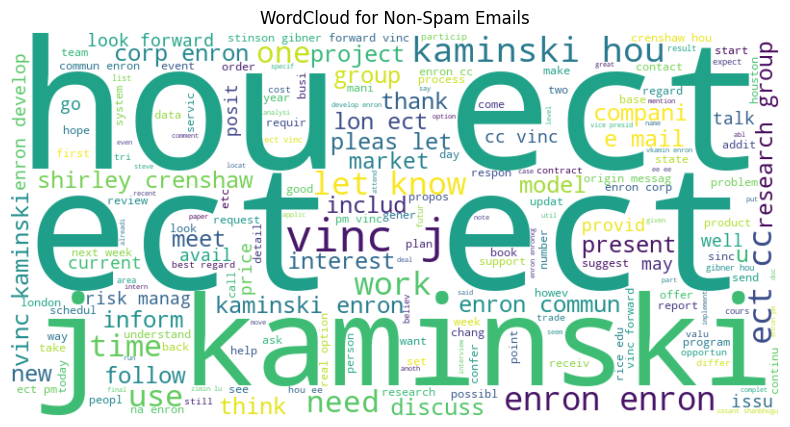

In [16]:
# Word cloud visualization for non-spam emails
not_spam_text = " ".join(not_spam_words)
wordcloud_not_spam = WordCloud(width=800, height=400, background_color="white").generate(not_spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Non-Spam Emails")
plt.show()

In [17]:
# Save dataframe with preprocessed text
df.to_csv('preprocessed_data.csv', index = False)